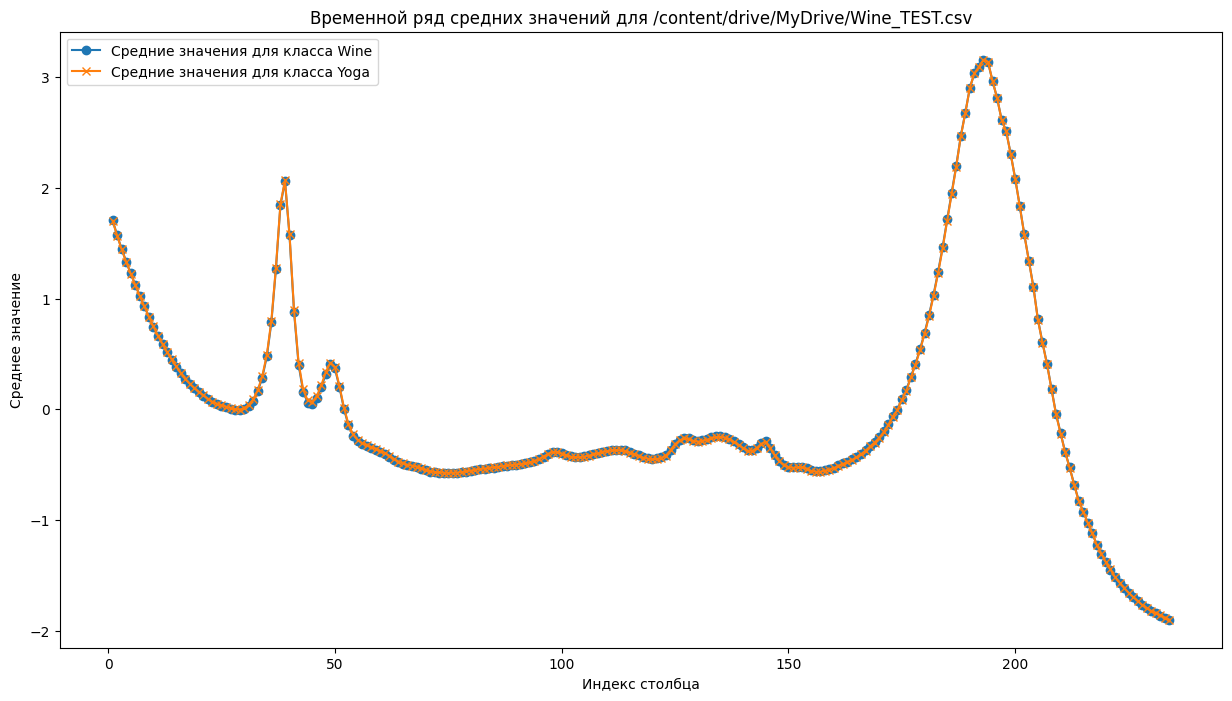

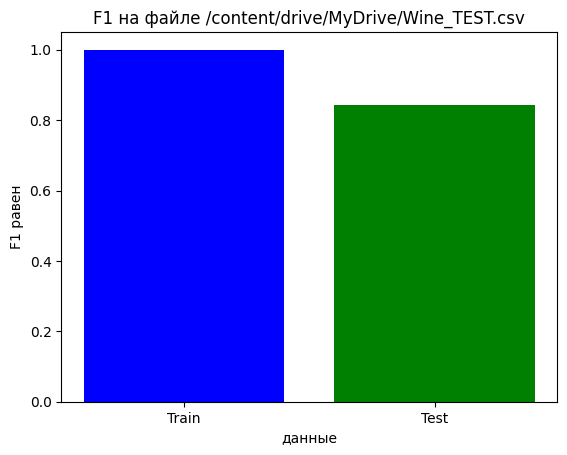

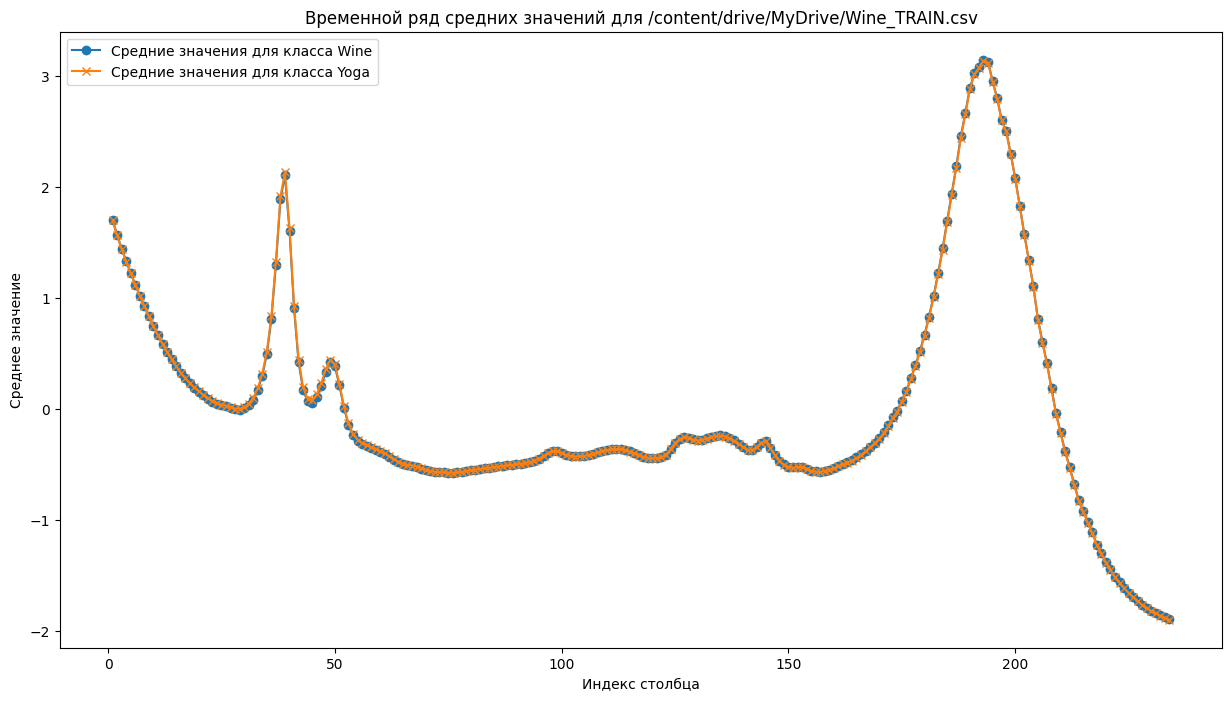

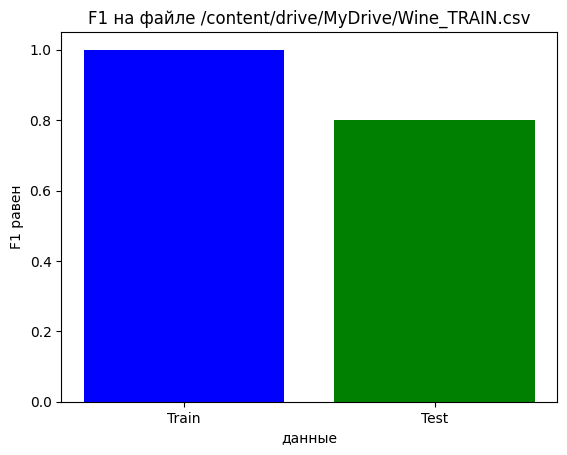

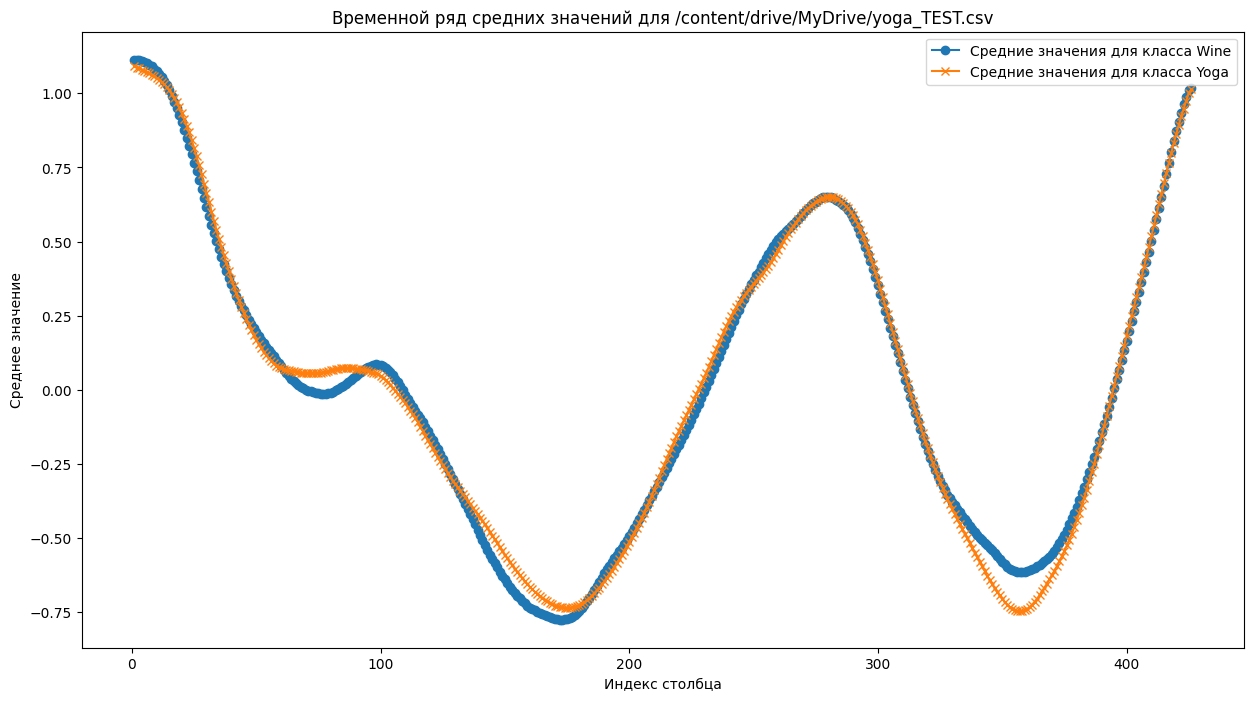

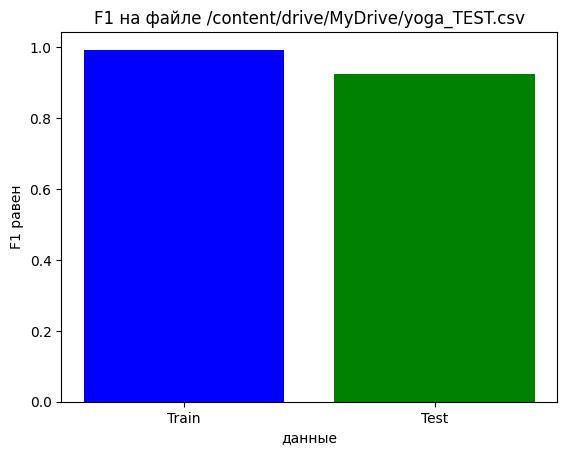

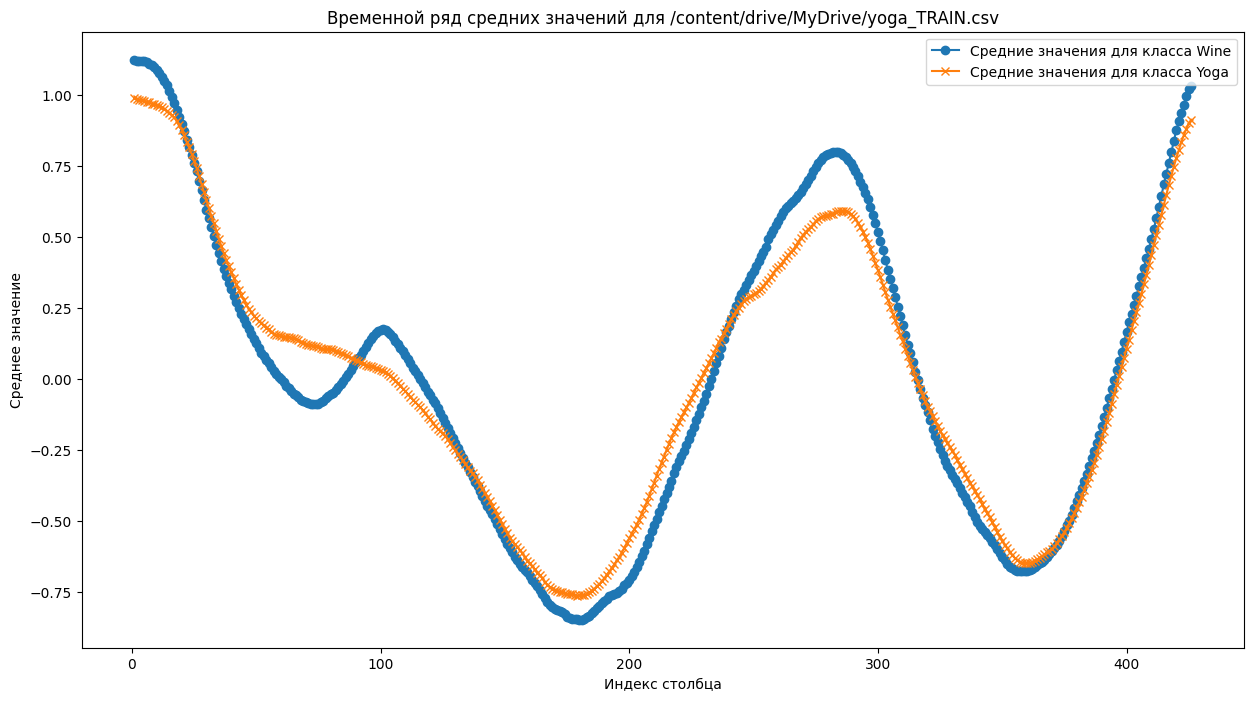

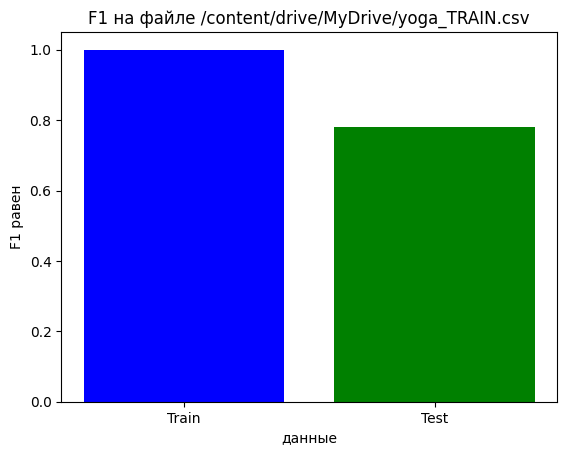

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

files = ['Wine_TEST.csv', 'Wine_TRAIN.csv', 'yoga_TEST.csv', 'yoga_TRAIN.csv']

for file in files:
    data = pd.read_csv(file, header=None)

    data_class_wine = data[data[0] == 1].drop(columns=[0])
    data_class_yoga = data[data[0] == 2].drop(columns=[0])

    mean_values_class_wine = data_class_wine.mean()
    mean_values_class_yoga = data_class_yoga.mean()

    plt.figure(figsize=(15, 8))
    plt.plot(mean_values_class_wine, label='Средние значения для класса Wine', marker='o')
    plt.plot(mean_values_class_yoga, label='Средние значения для класса Yoga', marker='x')
    plt.title(f'Временной ряд средних значений для {file}')
    plt.xlabel('Индекс столбца')
    plt.ylabel('Среднее значение')
    plt.legend()
    plt.show()



    model = CatBoostClassifier()
    y = data[0]
    X = data.drop(columns = [0])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    model = CatBoostClassifier(iterations=100)
    model.fit(X_train, y_train, verbose=0)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    f1_train = f1_score(y_train, y_train_pred)
    f1_test = f1_score(y_test, y_test_pred)

    f1_scores = [f1_train, f1_test]
    labels = ['Train', 'Test']

    plt.bar(labels, f1_scores, color=['blue', 'green'])

    # Add a title and labels
    plt.title(f'F1 на файле {file}')
    plt.xlabel('данные')
    plt.ylabel('F1 равен')

    # Show the plot
    plt.show()
